<a href="https://colab.research.google.com/github/beratcmn/healthcare-diabetes/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("./Healthcare-Diabetes.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [5]:
data.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
data.duplicated().sum()

0

<Axes: >

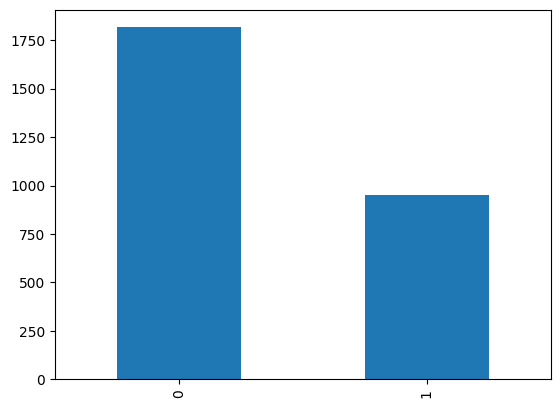

In [7]:
data["Outcome"].value_counts().plot(kind="bar")

In [8]:
data = data.drop(columns=['Id'])

In [9]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
data = data.sample(frac=1, random_state=36)

In [11]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']

In [12]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
2307,3,158,70,30,328,35.5,0.344,35
2296,6,154,78,41,140,46.1,0.571,27
2001,10,161,68,23,132,25.5,0.326,47
2593,8,65,72,23,0,32.0,0.600,42
2424,9,72,78,25,0,31.6,0.280,38


In [13]:
y.head()

2307    1
2296    0
2001    1
2593    0
2424    0
Name: Outcome, dtype: int64

In [14]:
train_proportion = 0.8

In [15]:
X_train_rows = int(train_proportion * len(X))
X_test_rows = len(X) - X_train_rows
X_train_rows, X_test_rows

(2214, 554)

In [16]:
y_train_rows = int(train_proportion * len(y))
y_test_rows = len(y) - y_train_rows
y_train_rows, y_test_rows

(2214, 554)

In [17]:
X_train = X[:X_train_rows]
X_test = X[X_test_rows:]

In [18]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
2307,3,158,70,30,328,35.5,0.344,35
2296,6,154,78,41,140,46.1,0.571,27
2001,10,161,68,23,132,25.5,0.326,47
2593,8,65,72,23,0,32.0,0.600,42
2424,9,72,78,25,0,31.6,0.280,38


In [19]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1284,9,145,88,34,165,30.3,0.771,53
2011,3,99,80,11,64,19.3,0.284,30
1271,7,94,64,25,79,33.3,0.738,41
1392,2,108,64,0,0,30.8,0.158,21
1278,12,84,72,31,0,29.7,0.297,46


In [20]:
y_train = y[:y_train_rows]
y_test = y[y_test_rows:]

In [21]:
y_train.head()

2307    1
2296    0
2001    1
2593    0
2424    0
Name: Outcome, dtype: int64

In [22]:
y_test.head()

1284    1
2011    0
1271    0
1392    0
1278    1
Name: Outcome, dtype: int64

In [23]:
X_train.shape

(2214, 8)

In [24]:
model = None

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Normalization(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 8)                17        
 n)                                                              
                                                                 
 dense (Dense)               (None, 256)               2304      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                        

In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1,
)

In [28]:
#early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=16, restore_best_weights=True)

In [29]:
history = model.fit(X_train, y_train, epochs=512, batch_size=128, validation_split=0.1, callbacks=[checkpoint_callback])

Epoch 1/512
15/16 [===========================>..] - ETA: 0s - loss: 1.1991 - accuracy: 0.5797
Epoch 1: val_accuracy improved from -inf to 0.68018, saving model to model.h5
16/16 [==============================] - 5s 54ms/step - loss: 1.1826 - accuracy: 0.5818 - val_loss: 0.6269 - val_accuracy: 0.6802
Epoch 2/512
15/16 [===========================>..] - ETA: 0s - loss: 0.6524 - accuracy: 0.6521
Epoch 2: val_accuracy did not improve from 0.68018
16/16 [==============================] - 0s 12ms/step - loss: 0.6502 - accuracy: 0.6521 - val_loss: 0.6032 - val_accuracy: 0.6622
Epoch 3/512
12/16 [=====================>........] - ETA: 0s - loss: 0.6158 - accuracy: 0.6927
Epoch 3: val_accuracy did not improve from 0.68018
16/16 [==============================] - 0s 20ms/step - loss: 0.6145 - accuracy: 0.6817 - val_loss: 0.5986 - val_accuracy: 0.6802
Epoch 4/512
13/16 [=======================>......] - ETA: 0s - loss: 0.6161 - accuracy: 0.6911
Epoch 4: val_accuracy improved from 0.68018 to 0.7

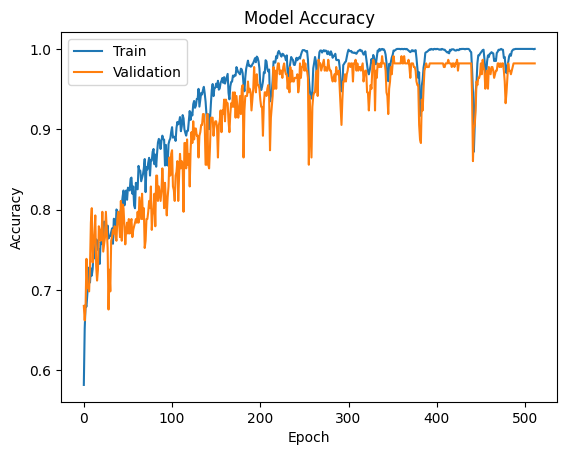

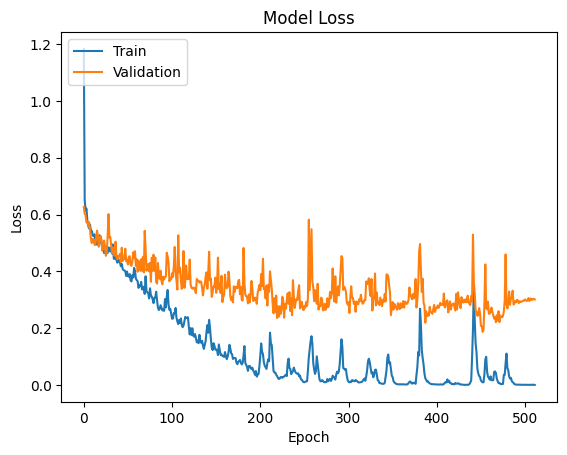

In [30]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

print("\n")

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [31]:
model = None
model = tf.keras.models.load_model('model.h5')

In [32]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {(test_accuracy * 100):.4f}%")

70/70 [==============================] - 0s 2ms/step - loss: 0.1320 - accuracy: 0.9896
Test Accuracy: 98.9612%


In [33]:
model.save("model.h5")